In [ ]:
from matplotlib import pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch import nn
import numpy as np

transform = transforms.ToTensor()

criterion = nn.CrossEntropyLoss()

batch_size = 256

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

dataiter = iter(trainloader)
images, labels = next(dataiter)

class LeakyReLUModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 16 * 16, n_dim)
        self.fc2 = nn.Linear(n_dim, 512)
        self.fc3 = nn.Linear(512, 10)

        self.act = nn.LeakyReLU()

    def forward(self, x):
        x = self.act(self.batchnorm1(self.conv1(x)))
        x = self.act(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)

        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)

        return x

class SigmoidModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 16 * 16, n_dim)
        self.fc2 = nn.Linear(n_dim, 512)
        self.fc3 = nn.Linear(512, 10)

        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.batchnorm1(self.conv1(x)))
        x = self.act(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)

        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)

        return x


class LeakyReLUDropoutModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 16 * 16, n_dim)
        self.fc2 = nn.Linear(n_dim, 512)
        self.fc3 = nn.Linear(512, 10)

        self.dropout = nn.Dropout(p=0.1)
        self.act = nn.LeakyReLU()

    def forward(self, x):
        x = self.act(self.batchnorm1(self.conv1(x)))
        x = self.act(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)

        x = self.act(self.fc1(x))
        x = self.dropout(x)
        x = self.act(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.legend()
    plt.show()


Files already downloaded and verified
Files already downloaded and verified


Adam LeakyReLU Start
Epoch   0 | Loss: 335.08571207523346
Epoch   1 | Loss: 218.69425404071808
Epoch   2 | Loss: 176.3543871641159
Epoch   3 | Loss: 148.72458004951477
Epoch   4 | Loss: 124.6370860338211
Epoch   5 | Loss: 102.91328191757202
Epoch   6 | Loss: 81.50498995184898
Epoch   7 | Loss: 64.10709185898304
Epoch   8 | Loss: 46.62465603649616
Epoch   9 | Loss: 34.0954991877079
Epoch  10 | Loss: 24.801358435302973
Epoch  11 | Loss: 22.515563391149044
Epoch  12 | Loss: 13.115030501037836
Epoch  13 | Loss: 12.46543264389038
Epoch  14 | Loss: 12.397045902907848
Epoch  15 | Loss: 12.423580726608634
Epoch  16 | Loss: 13.311579873785377
Epoch  17 | Loss: 7.502781356219202
Epoch  18 | Loss: 11.015519716776907
Epoch  19 | Loss: 8.411074253730476
Epoch  20 | Loss: 7.248080698773265
Epoch  21 | Loss: 7.042366105597466
Epoch  22 | Loss: 7.811332298908383
Epoch  23 | Loss: 9.436924384441227
Epoch  24 | Loss: 7.648570780642331
Epoch  25 | Loss: 6.3142112963832915
Epoch  26 | Loss: 5.592754128854

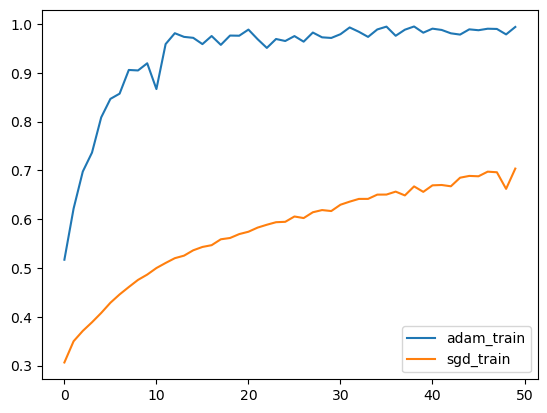

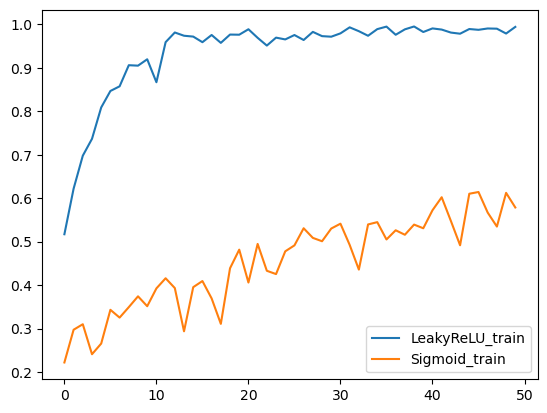

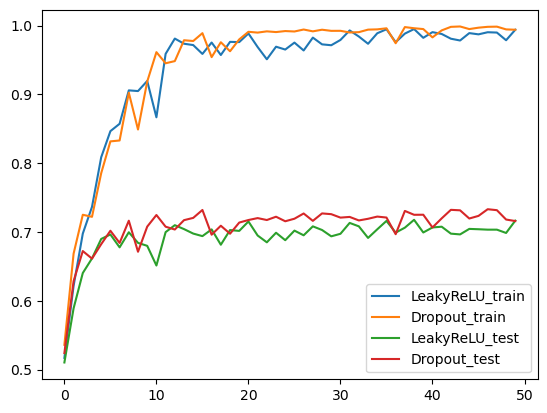

In [ ]:


adam_train_accuracy, adam_test_accuracy = [], []
sgd_train_accuracy, sgd_test_accuracy = [], []
adam_sigmoid_train_accuracy, adam_sigmoid_test_accuracy = [], []
dropout_train_accuracy, dropout_test_accuracy = [], []

adam_leakyReLU_model = LeakyReLUModel(32 * 32 * 3, 1024)
sgd_leakyReLU_model = LeakyReLUModel(32 * 32 * 3, 1024)
adam_sigmoid_model = SigmoidModel(32 * 32 * 3, 1024)
dropout_leakyReLU_model = LeakyReLUDropoutModel(32 * 32 * 3, 1024)

from torch.optim import Adam
from torch.optim import SGD

lr = 0.001
adam_leakyReLU_model = adam_leakyReLU_model.to('cuda')
sgd_leakyReLU_model = sgd_leakyReLU_model.to('cuda')
adam_sigmoid_model = adam_sigmoid_model.to('cuda')
dropout_leakyReLU_model = dropout_leakyReLU_model.to('cuda')

adam_optimizer = Adam(adam_leakyReLU_model.parameters(), lr=lr)
sgd_optimizer = SGD(sgd_leakyReLU_model.parameters(), lr=lr)
adam_sigmoid_optimizer = Adam(adam_sigmoid_model.parameters(), lr=lr)
dropout_leakyReLU_optimizer = Adam(dropout_leakyReLU_model.parameters(), lr=lr)

n_epochs = 50

def DoModelTrain(trainloader, testloader, model, train_accuracy, test_accuracy, optimizer):
    for epoch in range(n_epochs):
        total_loss = 0.
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            preds = model(inputs)

            # Use CrossEntropyLoss
            loss = criterion(preds, labels)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # test
        with torch.no_grad():
            model.eval()

            # accuracy test
            train_accuracy.append(accuracy(model, trainloader))
            test_accuracy.append(accuracy(model, testloader))

            model.train()

        print(f"Epoch {epoch:3d} | Loss: {total_loss}")

print("Adam LeakyReLU Start")
DoModelTrain(trainloader, testloader, adam_leakyReLU_model, adam_train_accuracy, adam_test_accuracy, adam_optimizer)
print("SGD LeakyReLU Start")
DoModelTrain(trainloader, testloader, sgd_leakyReLU_model, sgd_train_accuracy, sgd_test_accuracy, sgd_optimizer)
print("Adam Sigmoid Start")
DoModelTrain(trainloader, testloader, adam_sigmoid_model, adam_sigmoid_train_accuracy, adam_sigmoid_test_accuracy, adam_sigmoid_optimizer)
print("Adam LeakyReLU Dropout Start")
DoModelTrain(trainloader, testloader, dropout_leakyReLU_model, dropout_train_accuracy, dropout_test_accuracy, dropout_leakyReLU_optimizer)

plot_acc(adam_train_accuracy, sgd_train_accuracy, "adam_train", "sgd_train")
plot_acc(adam_train_accuracy, adam_sigmoid_train_accuracy, "LeakyReLU_train", "Sigmoid_train")

x = np.arange(len(adam_train_accuracy))
plt.plot(x, adam_train_accuracy, label="LeakyReLU_train")
plt.plot(x, dropout_train_accuracy, label="Dropout_train")
plt.plot(x, adam_test_accuracy, label="LeakyReLU_test")
plt.plot(x, dropout_test_accuracy, label="Dropout_test")
plt.legend()
plt.show()

# 설명


---

## Sigmoid 와 ReLU, LeakyReLU 의 차이

가장 먼저 등장한 활성 함수는 Sigmoid. 하지만 해당 함수의 경우 원점 인근을 제외한 대부분의 구간에서 기울기 소실 문제가 발생함. 기울기 소실 문제는 레이어가 깊어질수록 심해져, 학습을 멈추게 만들 수 있음.

기울기 소실 문제는 활성함수에 기울기가 낮은 부분이 너무 많기 때문, ReLU 의 경우 0이상인 모든 구간에 대하 기울기 소실 문제가 발생하지 않음. 따라서 더 깊은 신경망을 구성하는 것에 적합.

하지만 ReLU도 0미만에서 기울기를 갖지 않아 기울기 소실의 가능성이 있음. LeakyReLU의 경우 0미만에서도 약간의 기울기를 가져 기울기 소실 문제를 더 줄임.


---

## Adam과 SGD의 차이

SGD는 가장 기본적인 형태의 최적화 함수. 최적화 함수의 고질적인 문제는 lr 설정에 있음. lr을 너무 높게 설정하면 오버슈팅이 발생할 수 있고, lr이 너무 작을 경우 사소한 local minimum 에 너무 쉽게 빠져버림. 때문에 학습이 진행되는 동안 유연하게 lr을 바꿔줄 수 있는 최적화 함수가 필요.

이를 위해 등장한 최적화 함수가 RMSProp 와 Momentum 이었으며, Adam 의 경우 이 둘을 결합한 형태의 최적화 함수. 따라서 대부분의 경우 Adam이 빠르고 뛰어난 학습 속도를 보임


---

## Dropout

일반적으로 과적합을 방지하기 위해 사용하는 방식. 결과를 살펴보면 Dropout 을 적용한 경우의 정확도가 약간 더 높으나, 학습할수록 정확도가 하락하는 현상은 거의 보이지 않았음. 따라서 과적합은 별로 없었던 것으로 추정.